In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import os

In [ ]:
import seaborn as sns
from keras.applications.vgg16 import VGG16
from sklearn import preprocessing
from keras_preprocessing.image import load_img
from sklearn import preprocessing
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
size = 224
train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/full/train/*"):
    label = directory_path.split("\\")[-1]
    # print('\n')
    # print('\n')
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(size,size))
        train_images.append(img)
        train_labels.append(label)
       # print(label)

      
"""Note: Better to work with (numpy) array than a normal list as in the normal
list we will have to iterate over all the elements using a loop
"""

train_images = np.array(train_images)
train_labels = np.array(train_labels)



In [ ]:
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/full/test/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, '*.jpg')):
        # print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(size,size))
        test_images.append(img)
        test_labels.append(label)



test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
print(train_labels_encoded)

[1 1 1 ... 2 2 2]


In [ ]:
'''
Here we reassingned the variables to new names as they are more meaningful(That is not actual splitting)
The splitting was already done
'''
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Saved Models/ResNet50.hdf5')

In [ ]:
# base_model=ResNet50(weights="imagenet",include_top=False, input_shape=(size, size, 3))

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# #Flatten output layer of Resnet
# flattened = tf.keras.layers.Flatten()(base_model.output)

# #Fully connected layer 1
# fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

# #Fully connected layer, output layer
# fc2 = tf.keras.layers.Dense(4, activation='softmax', name="AddedDense2")(fc1)
# model = tf.keras.models.Model(inputs=base_model.input, outputs=fc2)

In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# x_train.dtype
# print(x_train.shape)
# print(y_train.shape)
# model.fit(x_train,y_train,epochs=10)

Epoch 1/10
160/160 [==============================] - 11s 68ms/step - loss: 0.0892 - accuracy: 0.9701
Epoch 2/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0857 - accuracy: 0.9717
Epoch 3/10
160/160 [==============================] - 11s 67ms/step - loss: 0.1563 - accuracy: 0.9478
Epoch 4/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0390 - accuracy: 0.9883
Epoch 5/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0344 - accuracy: 0.9898
Epoch 6/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0702 - accuracy: 0.9764
Epoch 7/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0922 - accuracy: 0.9695
Epoch 8/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0264 - accuracy: 0.9910
Epoch 9/10
160/160 [==============================] - 11s 67ms/step - loss: 0.0089 - accuracy: 0.9965
Epoch 10/10
160/160 [==============================] - 11s 67ms/step - loss: 0.038

In [ ]:
# model.save('/content/drive/MyDrive/Saved Models/ResNet50.hdf5')

In [ ]:
Test_loss, Test_accuracy = model.evaluate(x_test,  y_test)

41/41 [==============================] - 106s 3s/step - loss: 0.2833 - accuracy: 0.9071


In [ ]:
print(Test_accuracy)

0.9071038365364075


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

41/41 [==============================] - 107s 3s/step


In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.907


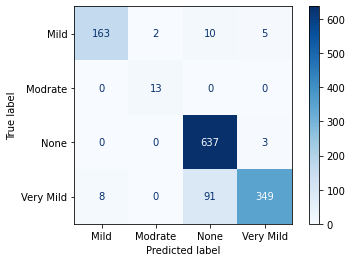

<Figure size 432x288 with 0 Axes>

In [ ]:

labels = ["Mild", "Modrate", "None","Very Mild"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.figure()
plt.show()